In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
dataa = pd.read_csv("Mall_Customers.csv")
dataa.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data=dataa[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']]

In [7]:
# scaling and normalizing the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

In [8]:
# reduce the dimensionality of the dataset
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0 -0.616450 -0.688409
1 -0.505240 -0.831002
2 -0.604943 -0.427461
3 -0.545842 -0.807508
4 -0.808550 -0.504300


In [9]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_
print(data.tail())

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  cluster
195         196   35                 120                      79       -1
196         197   45                 126                      28       -1
197         198   32                 126                      74       -1
198         199   32                 137                      18       -1
199         200   30                 137                      83       -1


In [14]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()
        

KeyError: 3

In [15]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [17]:
x=dataa.iloc[:,[3,4]].values

In [19]:
x.shape

(200, 2)

In [20]:
model=db.fit(x)

In [21]:
label=model.labels_

In [22]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [23]:
from sklearn import metrics
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


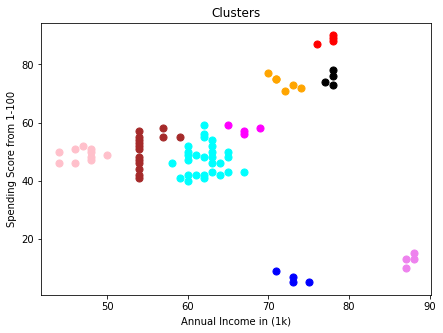

In [25]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'brown')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters')
plt.show()